<a href="https://colab.research.google.com/github/jopro-git/Terraform/blob/main/Hw2_Data_Mining_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding S2021


| Cur. Id | Student Number |Surname | First Name |
| --- | --- | --- | --- | 
| 258.417 | K12021147 | Proksch | Johannes |



## Task 1: Marketing data

### General Analysis

The dataset contains 2240 customer records (tuples) made up of 19 columns (attributes), which provide an understanding of age, marital status, income levels, levels of education and, to a certain extent, purchase history (based on web, catalogue, store, etc.). At first glance, without having cleaned the dataset, we see that roughly 3/4 of the registered customers have children (either kids or teens or both). Furthermore, the dataset is limited to a purchase history of 99 days. The type of purchases is segregated into web, catalogue or store purchases, whereas the median and mean are highest for store purchases, which implies that customers have purchased most goods directly in the store.

Throughout the analysis it has become apparent that the dataset did require some cleaning and reformatting in order to answer the particular areas of interest to the business. (All points of interest have been summarized here, but are also outlined with tables and graphs below). 

### 1. Distribution of age within each marital status

Seemingly most observations in the dataset consist of individuals that are married, followed by customers that are in registered partnerships ('Together'). As expected the number of widowed customers rises from the age 50 whereas the number of married customers declines. Suprisingly a high number of divorced customers are younger than the age of 50.

### 2. Distribution of education

The distribution of education shows that most customers have "graduated", this may mean graduated from secondary level education, although it may also be higher education. "2n Cycle" customers have been changed to "Master" for readability. Nearly half of all customers either have a Master degree or a PhD. 

### 3. Country with most web purchases

The data suggests that SP (presumably Spain) has the most web purchases summing up to 4370 web purchases, followed by SA (presumably South Africa) with 1393 web purchases. 

### 4. The average customer

Judging from the previous findings we can infer that the average customer is 52 years of age, likely to be married and have children with an income of around $52,000.00. Furthermore the average customer is very likely to have "graduated" from a secondary education level.



### 5. Most successful marketing campaign

The cleaned dataset suggests that the most successful campaign is campaign 4 with 164 values. Even though the records of very low income levels are still included in the dataset, the most successful campaign would still be campaign 4.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving company_data.csv to company_data.csv
User uploaded file "company_data.csv" with length 170028 bytes


In [ ]:
df = pd.read_csv('company_data.csv')

In [ ]:
df.head()

,customerNr,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,4,4,6,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,7,3,7,5,0,0,0,0,1,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,3,2,5,2,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,1,0,2,7,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,3,1,2,7,1,0,0,0,0,SP


In [ ]:
df.describe()

,customerNr,year_of_birth,kids,teens,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393
std,3246.662198,11.984069,0.538398,0.544538,28.962453,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['kids'].value_counts()

0    1293
1     899
2      48
Name: kids, dtype: int64

In [ ]:
df['teens'].value_counts()

0    1158
1    1030
2      52
Name: teens, dtype: int64

In [ ]:
nokids = df[df['kids']==0]
nokids[nokids['teens']==0] 

,customerNr,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,4,4,6,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,7,3,7,5,0,0,0,0,1,CA
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,4,7,5,2,0,0,0,0,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,10,10,7,6,1,0,0,0,0,GER
10,2079,1947,2n Cycle,Married,"$81,044.00",0,0,12/27/13,0,5,6,10,1,0,0,0,0,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,5871,1979,Master,Together,"$24,401.00",0,0,8/31/12,98,6,1,6,8,0,0,0,0,0,SA
2226,1743,1974,Graduation,Single,"$69,719.00",0,0,5/26/14,99,2,3,5,1,0,0,0,0,0,SP
2229,2106,1974,2n Cycle,Married,"$20,130.00",0,0,3/17/14,99,1,0,3,8,0,0,0,0,0,SP
2230,3363,1974,2n Cycle,Married,"$20,130.00",0,0,3/17/14,99,1,0,3,8,0,0,0,0,0,SP


In [ ]:
df.columns

Index(['customerNr', 'year_of_birth', 'education', 'marital_status', 'income',
       'kids', 'teens', 'customer_since', 'last_purchase_in_days',
       'web_purchases', 'catalog_purchases', 'store_purchases', 'web_visits',
       'campaign3', 'campaign4', 'campaign5', 'campaign1', 'campaign2',
       'country'],
      dtype='object')

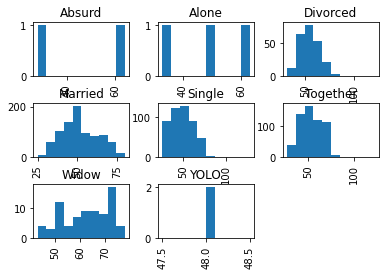

In [ ]:
df = df.set_index('customerNr')
df['age']= 2021 - df['year_of_birth']
df.hist(by='marital_status', column ='age')
plt.show()

#### Note: 
We see that the marital status has not been answered accurately in all cases.

In [ ]:
df['age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: age, dtype: float64

In [ ]:
df[df['age']==128]

,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country,age
customerNr,,,,,,,,,,,,,,,,,,,
11004,1893,2n Cycle,Single,"$60,182.00",0,1,5/17/14,23,1,0,2,4,0,0,0,0,0,SA,128


In [ ]:
df[df['age']>120]
df = df.drop([11004,1150,7829])

(array([ 43., 178., 203., 423., 388., 306., 276., 241., 155.,  24.]),
 array([25. , 30.6, 36.2, 41.8, 47.4, 53. , 58.6, 64.2, 69.8, 75.4, 81. ]),
 <BarContainer object of 10 artists>)

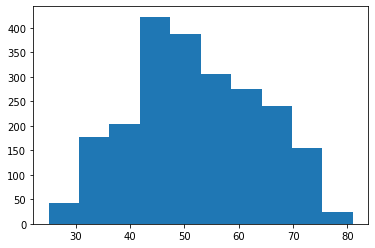

In [ ]:
plt.hist(df['age'])

In [ ]:
df['age'].describe()

count    2237.000000
mean       52.098346
std        11.701917
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: age, dtype: float64

#### Note: 

After having dropped the impossible ages of 120 and above we see that the average age of a customer is 52 years. 

In [ ]:
df['income'].describe()
df['income'] = df['income'].str.strip('$')
df['income'] = df['income'].str.replace('.','').str.replace(',','')
df = df.dropna(subset=['income'])
print(df['income'])

customerNr
1826     8483500
1        5709100
10476    6726700
1386     3247400
5371     2147400
          ...   
10142    6647600
5263     3105600
22       4631000
528      6581900
4070     9487100
Name: income, Length: 2213, dtype: object


<ipython-input-15-d64e81a8add7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.','').str.replace(',','')


In [ ]:
df['income'] = df['income'].astype('float')
df['income'] = df['income']/100
df['income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: income, dtype: float64

In [ ]:
df[df['income'] == 666666]
df=df.drop(9432)

In [ ]:
df[df['income'] > 100000]

,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country,age
customerNr,,,,,,,,,,,,,,,,,,,
10089,1974,Graduation,Divorced,102692.0,0,0,4/5/13,5,6,9,13,2,0,1,1,1,1,SA,47
4619,1945,PhD,Single,113734.0,0,0,5/28/14,9,27,0,0,1,0,0,0,0,0,SP,76
4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,0,28,0,1,0,0,0,0,0,SA,44
1501,1982,PhD,Married,160803.0,0,0,8/4/12,21,0,28,1,0,0,0,0,0,0,US,39
1503,1976,PhD,Together,162397.0,1,1,6/3/13,31,0,0,1,1,0,0,0,0,0,SP,45
4611,1970,Graduation,Together,105471.0,0,0,1/21/13,36,9,8,13,3,0,0,1,1,0,SP,51
5336,1971,Master,Together,157733.0,1,0,6/4/13,37,1,0,1,1,0,0,0,0,0,SP,50
2798,1977,PhD,Together,102160.0,0,0,11/2/12,54,7,9,10,4,0,1,1,1,0,SA,44
7215,1983,Graduation,Single,101970.0,0,0,3/12/13,69,6,8,13,2,0,1,1,1,0,CA,38


In [ ]:
lowincome = df[df['income'] < 10000]
lowincome.shape

(29, 19)

#### Note: 

All income values of NA and the outlier value of 666,666.00 have been dropped from the dataset. The dataset now consists of 2212 rows.

In [ ]:
df.shape

(2212, 19)

In [ ]:
df.describe()

,year_of_birth,income,kids,teens,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,age
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.913653,51958.810579,0.441682,0.505877,49.019439,4.088156,2.672242,5.806510,5.321429,0.073689,0.074141,0.072785,0.064195,0.013562,52.086347
std,11.701599,21527.278844,0.536955,0.544253,28.943121,2.742187,2.927542,3.250939,2.425597,0.261323,0.262060,0.259842,0.245156,0.115691,11.701599
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1959.000000,35233.500000,0.000000,0.000000,24.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,1970.000000,51371.000000,0.000000,0.000000,49.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000


#### Note: 

The median income of a customer consists of roughly 51,000.00, the true average may be higher as around 29 customer records are below 10,000.00 which have not been dropped from the dataset. 

(array([ 90., 410., 557., 527., 472., 142.,   7.,   0.,   0.,   7.]),
 array([  1730. ,  17796.7,  33863.4,  49930.1,  65996.8,  82063.5,
         98130.2, 114196.9, 130263.6, 146330.3, 162397. ]),
 <BarContainer object of 10 artists>)

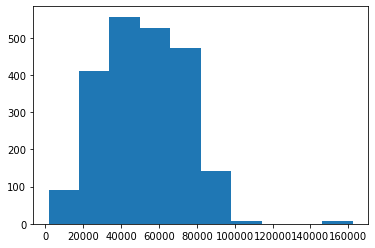

In [ ]:
plt.hist(df['income'])

In [ ]:
df.marital_status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
df[df['marital_status'] == 'Together']

,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country,age
customerNr,,,,,,,,,,,,,,,,,,,
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,1,0,2,7,0,0,0,0,0,AUS,54
1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,2,1,3,5,0,0,0,0,0,SP,54
5642,1979,Master,Together,62499.0,1,0,12/9/13,0,3,1,6,4,0,0,0,0,0,SP,42
2285,1954,Master,Together,36634.0,0,1,5/28/13,0,5,2,5,7,0,0,0,0,0,SA,67
5430,1956,Graduation,Together,54450.0,1,1,9/14/12,0,9,2,8,8,0,0,0,0,0,SP,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,1978,Graduation,Together,41154.0,0,1,4/9/13,98,1,0,4,5,0,0,0,0,0,SP,43
5871,1979,Master,Together,24401.0,0,0,8/31/12,98,6,1,6,8,0,0,0,0,0,SA,42
10001,1985,2n Cycle,Together,7500.0,1,0,8/1/12,98,2,1,3,9,0,0,0,0,0,SP,36


In [ ]:
df['marital_status'] = df['marital_status'].str.replace('Together', 'Registered Partnership')

In [ ]:
df.marital_status.unique()

array(['Divorced', 'Single', 'Married', 'Registered Partnership', 'Widow',
       'YOLO', 'Alone', 'Absurd'], dtype=object)

In [ ]:
df[df['marital_status'] == 'Absurd']
df=df.drop([4369,7734])

In [ ]:
df[df['marital_status'] == 'Alone']

,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country,age
customerNr,,,,,,,,,,,,,,,,,,,
92,1988,Graduation,Alone,34176.0,1,0,5/12/14,12,3,0,4,6,0,0,0,0,0,CA,33
7660,1973,PhD,Alone,35860.0,1,1,5/19/14,37,1,1,2,5,1,0,0,0,0,CA,48
433,1958,Master,Alone,61331.0,1,1,3/10/13,42,11,1,6,8,0,0,0,0,0,CA,63


In [ ]:
df['marital_status'] = df['marital_status'].str.replace('Alone', 'Single')

In [ ]:
df[df['marital_status'] == 'YOLO']
df=df.drop([492,11133])

In [ ]:
df[df['marital_status'] == 'Widow']
df['marital_status'] = df['marital_status'].str.replace('Widow', 'Widowed')

In [ ]:
df[df['marital_status'] == 'Divorced']

,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country,age
customerNr,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,4,4,6,1,0,0,0,0,0,SP,51
10175,1958,PhD,Divorced,32173.0,0,1,8/1/13,0,1,0,3,4,0,0,0,0,0,SP,63
8890,1971,PhD,Divorced,65808.0,1,1,5/30/14,1,5,1,5,6,0,0,0,0,0,SP,50
10141,1960,Master,Divorced,39228.0,0,0,5/10/13,1,0,0,3,4,0,0,0,0,0,SA,61
5740,1970,2n Cycle,Divorced,25959.0,1,1,2/14/13,1,1,2,2,6,0,0,0,0,0,SP,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,1960,PhD,Divorced,50611.0,0,1,10/4/12,98,4,5,7,6,0,1,0,0,0,US,61
5687,1980,Graduation,Divorced,81702.0,0,0,9/23/12,98,7,7,12,3,0,0,0,0,0,CA,41
9977,1973,Graduation,Divorced,78901.0,0,1,9/17/13,99,9,3,5,4,0,0,0,0,0,US,48


In [ ]:
df.marital_status.unique()

array(['Divorced', 'Single', 'Married', 'Registered Partnership',
       'Widowed'], dtype=object)

#### Note: 

For more appropriate labelling purposes "Together" has been changed to "Registered Partnership". "Absurd" and "Yolo" entries have been dropped from the dataset. 

In [ ]:
print(Counter(df['marital_status']))

Counter({'Married': 857, 'Registered Partnership': 571, 'Single': 473, 'Divorced': 231, 'Widowed': 76})


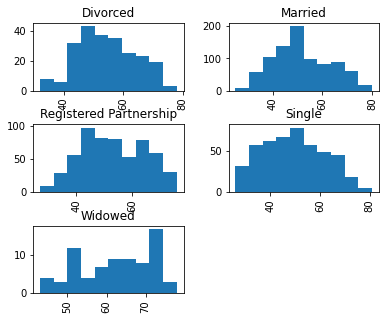

In [ ]:
maritalage = df.hist(by='marital_status', column ='age', figsize =[6,5])

### 1. Distribution of age within each marital status

Seemingly most observations in the dataset consist of individuals that are married, followed by customers that are in registered partnerships ('Together'). As expected the number of widowed customers rises from the age 50 whereas the number of married customers declines. Suprisingly a high number of divorced customers are younger than the age of 50. 

In [ ]:
df.education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
df[df['education']=='2n Cycle']
df['education'] = df['education'].str.replace('2n Cycle', 'Master')

In [ ]:
df[df['education']=='Graduation']

,year_of_birth,education,marital_status,income,kids,teens,customer_since,last_purchase_in_days,web_purchases,catalog_purchases,store_purchases,web_visits,campaign3,campaign4,campaign5,campaign1,campaign2,country,age
customerNr,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,4,4,6,1,0,0,0,0,0,SP,51
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,7,3,7,5,0,0,0,0,1,CA,60
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,3,2,5,2,0,0,0,0,0,US,63
1386,1967,Graduation,Registered Partnership,32474.0,1,1,5/11/14,0,1,0,2,7,0,0,0,0,0,AUS,54
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,3,1,2,7,1,0,0,0,0,SP,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,1973,Graduation,Widowed,42429.0,0,1,2/11/14,99,1,1,3,5,0,0,0,0,0,AUS,48
7232,1973,Graduation,Widowed,42429.0,0,1,2/11/14,99,1,1,3,5,0,0,0,0,0,SP,48
9977,1973,Graduation,Divorced,78901.0,0,1,9/17/13,99,9,3,5,4,0,0,0,0,0,US,48


In [ ]:
df.education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

(array([  54.,    0.,    0., 1114.,    0.,    0.,  562.,    0.,    0.,
         478.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

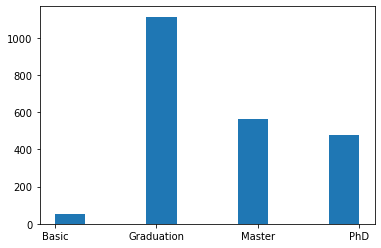

In [ ]:
plt.hist(df['education'].sort_values())

### 2. Distribution of education

The distribution of education shows that most customers have "graduated", this may mean graduated from secondary level education, although it may also be higher education. "2n Cycle" customers have been changed to "Master" for readability. Nearly half of all customers either have a Master degree or a PhD. 

In [ ]:
df['education'].value_counts()

Graduation    1114
Master         562
PhD            478
Basic           54
Name: education, dtype: int64

In [ ]:
grouped = df.groupby(['country'])['web_purchases'].sum()
grouped

country
AUS     591
CA     1132
GER     464
IND     575
ME       18
SA     1393
SP     4370
US      479
Name: web_purchases, dtype: int64

<AxesSubplot:ylabel='country'>

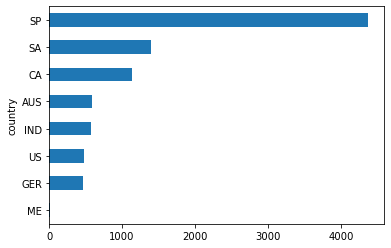

In [ ]:
df.groupby('country')['web_purchases'].sum().sort_values().plot(kind='barh')

### 3. Country with most web purchases

The data suggests that SP (presumably Spain) has the most web purchases summing up to 4370 web purchases, followed by SA (presumably South Africa) with 1393 web purchases. 

([<matplotlib.axis.XTick at 0x7f8fea94fa90>,
 [Text(0, 0, 'campaign 1'),
  Text(1, 0, 'campaign 2'),
  Text(2, 0, 'campaign 3'),
  Text(3, 0, 'campaign 4'),
  Text(4, 0, 'campaign 5')])

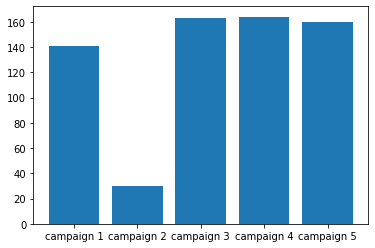

In [ ]:
c1 = df['campaign1'].sum()
c2 = df['campaign2'].sum()
c3 = df['campaign3'].sum()
c4 = df['campaign4'].sum()
c5 = df['campaign5'].sum()
sumc = [c1, c2, c3, c4, c5]
cn = ('campaign 1', 'campaign 2', 'campaign 3', 'campaign 4', 'campaign 5')
y_pos = np.arange(len(sumc))
plt.bar(y_pos, sumc)
plt.xticks(y_pos, cn)

In [ ]:
print(Counter(sumc))

Counter({141: 1, 30: 1, 163: 1, 164: 1, 160: 1})


### 5. Most successful marketing campaign

The cleaned dataset suggests that the most successful campaign is campaign 4 with 164 values. Even though the records of very low income levels are still included in the dataset, the most successful campaign would still be campaign 4.

## Task 2: Monthly revenues

In [ ]:
revenue = pd.read_csv('/Users/Johannes/Desktop/JKU/Data Mining/data/revenues.csv')
revenue.head()

,Branch,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 91,Week 92,Week 93,Week 94,Week 95,Week 96,Week 97,Week 98,Week 99,Week 100
0,F1,10047,10033,10057,10130,10051,9983,9923,9987,10070,...,10561,10522,10477,10498,10463,10446,10383.000,10399,10359,10328
1,F2,11785,11727,12098,11740,11453,11643,11726,12257,12641,...,11000,11310,11201,11431,11111,10932,11212.123,10800,10941,11023
2,F3,9048,9127,9133,9098,9132,9127,9080,9164,9261,...,10450,10536,10490,10521,10553,10518,10570.000,10567,10623,10666
3,F4,11917,12179,12584,12630,12674,12897,12498,13000,12271,...,9612,9731,9941,9700,10000,10200,10112.000,10312,10431,10478


In [ ]:
revenue.set_index('Branch')

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 91,Week 92,Week 93,Week 94,Week 95,Week 96,Week 97,Week 98,Week 99,Week 100
Branch,,,,,,,,,,,,,,,,,,,,,
F1,10047,10033,10057,10130,10051,9983,9923,9987,10070,9992,...,10561,10522,10477,10498,10463,10446,10383.000,10399,10359,10328
F2,11785,11727,12098,11740,11453,11643,11726,12257,12641,12572,...,11000,11310,11201,11431,11111,10932,11212.123,10800,10941,11023
F3,9048,9127,9133,9098,9132,9127,9080,9164,9261,9359,...,10450,10536,10490,10521,10553,10518,10570.000,10567,10623,10666
F4,11917,12179,12584,12630,12674,12897,12498,13000,12271,12028,...,9612,9731,9941,9700,10000,10200,10112.000,10312,10431,10478


In [ ]:
rev = revenue.set_index('Branch')

In [ ]:
rev = rev.T
print(rev)

Branch         F1         F2       F3       F4
Week 1    10047.0  11785.000   9048.0  11917.0
Week 2    10033.0  11727.000   9127.0  12179.0
Week 3    10057.0  12098.000   9133.0  12584.0
Week 4    10130.0  11740.000   9098.0  12630.0
Week 5    10051.0  11453.000   9132.0  12674.0
...           ...        ...      ...      ...
Week 96   10446.0  10932.000  10518.0  10200.0
Week 97   10383.0  11212.123  10570.0  10112.0
Week 98   10399.0  10800.000  10567.0  10312.0
Week 99   10359.0  10941.000  10623.0  10431.0
Week 100  10328.0  11023.000  10666.0  10478.0

[100 rows x 4 columns]


<AxesSubplot:>

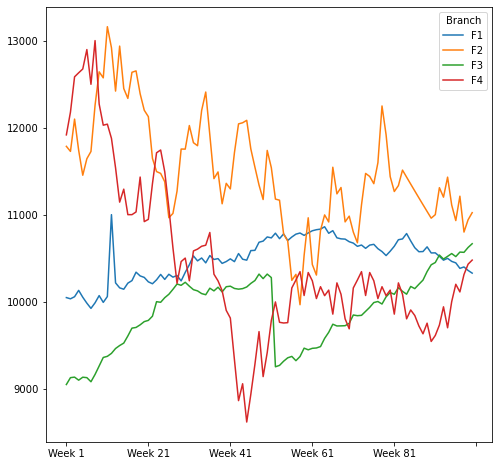

In [ ]:
rev.plot(legend=True, figsize=(8,8))

In [ ]:
rev.describe()
#rev.sum()

Branch,F1,F2,F3,F4
count,100.000000,100.000000,100.00000,100.000000
mean,10490.080000,11492.450851,9889.97000,10454.680000
std,246.233267,624.528173,426.44555,932.102683
min,9923.000000,9965.000000,9048.00000,8617.000000
25%,10310.000000,11092.469690,9493.00000,9853.000000
50%,10524.000000,11431.208000,10001.00000,10213.500000
75%,10696.500000,11800.750000,10175.75000,10926.500000
max,11000.000000,13160.000000,10666.00000,13000.000000


### Summary

The data suggests that not all branches have experienced strong fluctuations, we see from the graph above that branch F2 has the least deviation, whereas all other branches have shown strong fluctuation throughout the 100 week timeframe. 

The most appropriate level of measurement for all branches would be the mean, branch F2 has the highest mean out of all branches and would therefore be the most successful.

## Task 3: Production lines

In [ ]:
p1 = pd.read_csv('/Users/Johannes/Desktop/JKU/Data Mining/data/production_line1.csv')
p2 = pd.read_csv('/Users/Johannes/Desktop/JKU/Data Mining/data/production_line2.csv')
p3 = pd.read_csv('/Users/Johannes/Desktop/JKU/Data Mining/data/production_line3.csv')

In [ ]:
print(p1.head())

      line1
0  4.948485
1  4.857107
2  4.966848
3  4.825615
4  4.792381


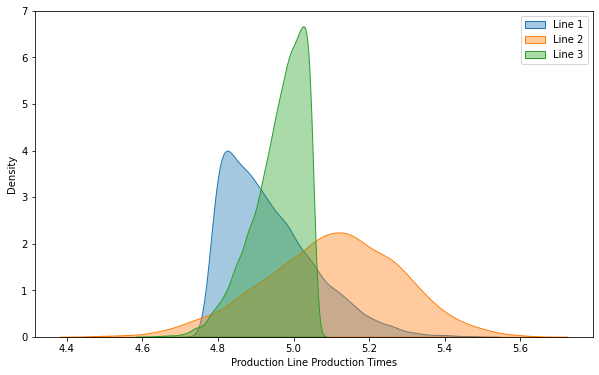

In [ ]:
psum = pd.concat([p1, p2, p3], axis=1)
plt.rcParams["figure.figsize"]=10,6
sns.kdeplot(data=psum, x="line1", label="Line 1", fill=True, common_norm=False, alpha=0.4)
sns.kdeplot(data=psum, x="line2", label="Line 2", fill=True, common_norm=False, alpha=0.4)
sns.kdeplot(data=psum, x="line3", label="Line 3", fill=True, common_norm=False, alpha=0.4)

plt.xlabel('Production Line Production Times')
plt.legend() 
plt.show()


In [ ]:
psum.describe()

,line1,line2,line3
count,9000.000000,5000.000000,12000.000000
mean,4.937433,5.100732,4.960518
std,0.119258,0.180232,0.069642
min,4.770668,4.480100,4.612524
25%,4.841542,4.983054,4.919967
50%,4.912194,5.108423,4.975032
75%,5.007246,5.227871,5.015801
max,5.488739,5.626067,5.053088


### Summary

- If the requirement is to produce as fast as possible production line 1 may be the the appropriate choice as the average production time is 4.937
- In order to fulfull a just-in-time production it would be best to choose production line 3, as it would be extremly likely that the production time would not exceed 5.053
- Violinplots also visualize the distribution of the data and not only provides summary statistics, such as mean, median and interquartile ranges. Violinplots are quite helpful if the visualized data has numerous peaks. Boxplots on the other hand do not provide the distribution but merely provide summary statistics. 

In [ ]:
print(psum.head())

      line1     line2     line3
0  4.948485  5.183779  4.922902
1  4.857107  5.078811  5.022093
2  4.966848  5.404393  4.943323
3  4.825615  5.254786  4.859796
4  4.792381  5.004993  5.047793


<AxesSubplot:xlabel='line1'>

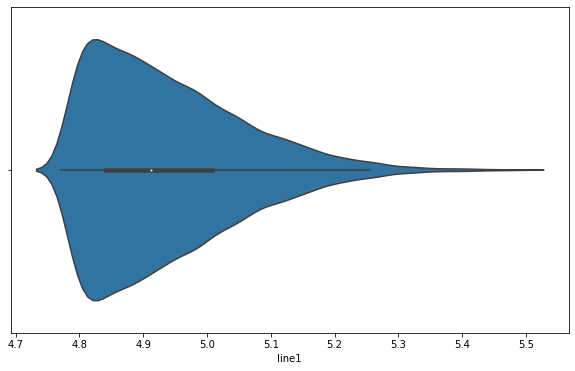

In [ ]:
sns.violinplot(x=p1['line1'], figsize=[2,2])

<AxesSubplot:xlabel='line2'>

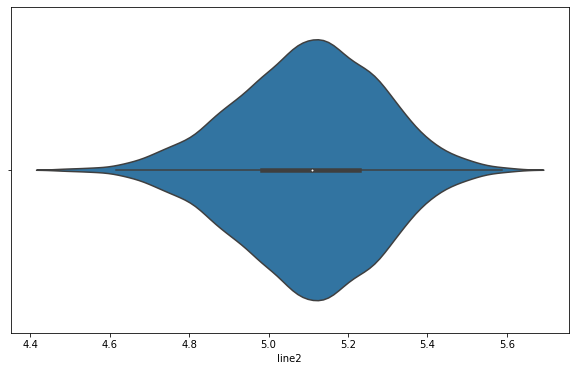

In [ ]:
sns.violinplot(x=p2['line2'], figsize=[2,2])

<AxesSubplot:xlabel='line3'>

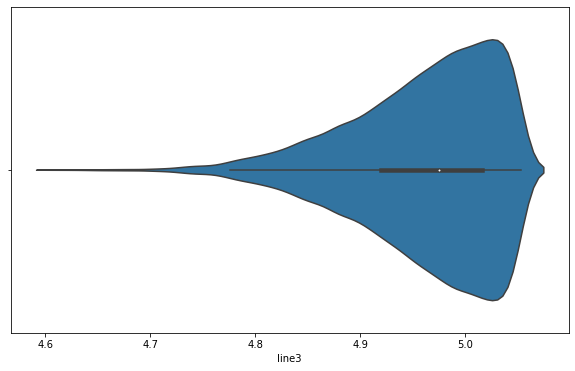

In [ ]:
sns.violinplot(x=p3['line3'], figsize=[2,2])

<AxesSubplot:xlabel='line1'>

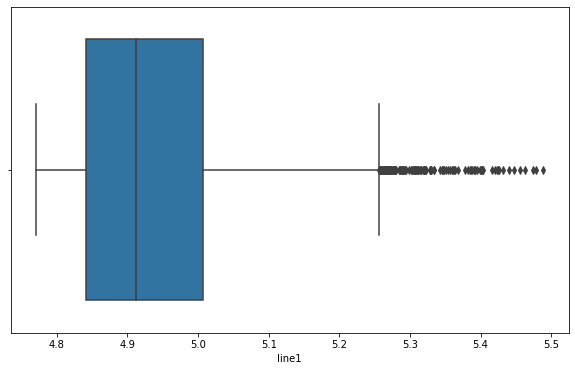

In [ ]:
sns.boxplot(x=psum['line1'])

<AxesSubplot:xlabel='line2'>

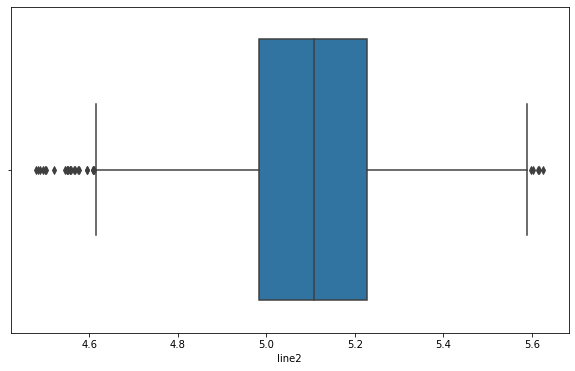

In [ ]:
sns.boxplot(x=psum['line2'])

<AxesSubplot:xlabel='line3'>

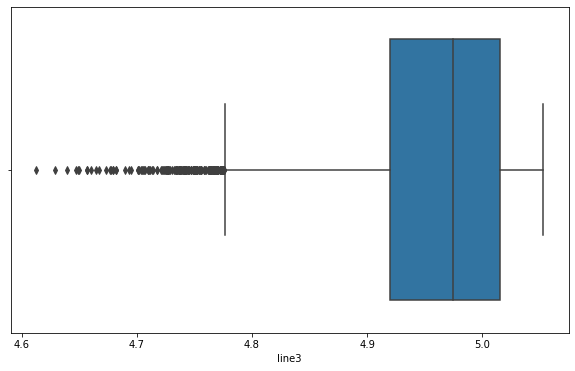

In [ ]:
sns.boxplot(x=psum['line3'])